In [1]:
import numpy as np
import pandas as pd
from src.helper_functions import calc_NMI
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#model order NMI data
# modelnames = ['Complex_Watson','Complex_ACG','MACG','SingularWishart']
modelnames = ['Complex_Watson','Complex_ACG']
K = 4
df3 = pd.DataFrame()
for modelname in modelnames:
    for K in np.arange(2,11):
        print(modelname,K)
        for rank in [10,25]:
            if rank==10:
                if modelname in ['Watson','Complex_Watson']:
                    rank_display = 1
                    rank_name = 10
                else:
                    rank_display = rank
                    rank_name = rank
            else:
                if modelname in ['Watson','Complex_Watson']:
                    continue
                else:
                    rank_display = rank
                    rank_name = rank
            for inner in range(10):
                try:
                    posterior = np.loadtxt('../data/results/116_results/posteriors/modelorder_realdata_'
                                            +modelname+'_K='+str(K)+'_test_posterior_rank'+str(rank_name)+'_inner'+str(inner)+'.txt')
                except:
                    try:
                        posterior = np.loadtxt('../data/results/116_results/posteriors/modelorder_realdata_'
                                                +modelname+'_K='+str(K)+'_rank='+str(rank_name)+'_test_posterior_rank'+str(rank_name)+'_inner'+str(inner)+'.txt')
                    except:
                        continue
                df_tmp = pd.DataFrame()
                df_tmp['modelname'] = [modelname]
                df_tmp['rank'] = [rank_display]
                df_tmp['K'] = [K]
                df_tmp['inner'] = [inner]
                df_tmp['test_posterior'] = [posterior]
                df3 = pd.concat([df3,df_tmp])
            

Complex_Watson 2
Complex_Watson 3
Complex_Watson 4
Complex_Watson 5
Complex_Watson 6
Complex_Watson 7
Complex_Watson 8
Complex_Watson 9
Complex_Watson 10
Complex_ACG 2
Complex_ACG 3
Complex_ACG 4
Complex_ACG 5
Complex_ACG 6
Complex_ACG 7
Complex_ACG 8
Complex_ACG 9
Complex_ACG 10


In [10]:
df_NMI = pd.DataFrame()
#model 1
for modelname in modelnames:
    for rank in [10,25]:
        if rank==10:
            if modelname in ['Watson','Complex_Watson']:
                rank_name = 1
            else:
                rank_name = rank
        else:
            if modelname in ['Watson','Complex_Watson']:
                continue
            else:
                rank_name = rank
        for K in np.arange(2,11):

            df3_tmp = df3[(df3['modelname']==modelname) & (df3['K']==K) & (df3['rank']==rank_name)]
            posteriors1 = df3_tmp['test_posterior'].values

            #model 2
            for modelname2 in modelnames:
                for rank2 in [10,25]:
                    if rank2==10:
                        if modelname2 in ['Watson','Complex_Watson']:
                            rank_name2 = 1
                        else:
                            rank_name2 = rank2
                    else:
                        if modelname2 in ['Watson','Complex_Watson']:
                            continue
                        else:
                            rank_name2 = rank2
                    for K2 in np.arange(2,11):
                        df3_tmp2 = df3[(df3['modelname']==modelname2) & (df3['K']==K2) & (df3['rank']==rank_name2)]
                        posteriors2 = df3_tmp2['test_posterior'].values
                        min_length = min(len(posteriors1),len(posteriors2))
                        NMIs = np.zeros((min_length))
                        if modelname == modelname2 and K==K2 and rank_name==rank_name2:
                            # the two models are the same
                            for i in range(min_length-1):
                                NMIs[i] = calc_NMI(posteriors1[i],posteriors2[i+1])
                            NMIs[-1] = calc_NMI(posteriors1[0],posteriors2[-1])
                        else:
                            for i in range(min_length):
                                NMIs[i] = calc_NMI(posteriors1[i],posteriors2[i])
                        df_tmp = pd.DataFrame()
                        df_tmp['modelname1'] = [modelname]
                        df_tmp['modelname2'] = [modelname2]
                        df_tmp['K1'] = [K]
                        df_tmp['K2'] = [K2]
                        df_tmp['rank1'] = [rank_name]
                        df_tmp['rank2'] = [rank_name2]
                        df_tmp['NMI'] = [NMIs]
                        df_tmp['mean_NMI'] = [np.mean(NMIs)]
                        if modelname in ['Watson','Complex_Watson']:
                            df_tmp['m1'] = [modelname+' K='+str(K)]
                        else:
                            df_tmp['m1'] = [modelname+' r='+str(rank_name)+' K='+str(K)]
                        if modelname2 in ['Watson','Complex_Watson']:
                            df_tmp['m2'] = [modelname2+' K='+str(K2)]
                        else:
                            df_tmp['m2'] = [modelname2+' r='+str(rank_name2)+' K='+str(K2)]
                        df_NMI = pd.concat([df_NMI,df_tmp],ignore_index=True)
                        

In [11]:
modelnames2 = df_NMI['m1'].unique()
NMI_mat = np.zeros((len(modelnames2),len(modelnames2)))
for i in range(len(modelnames2)):
    for j in range(len(modelnames2)):
        NMI_mat[i,j] = df_NMI[(df_NMI['m1']==modelnames2[i]) & (df_NMI['m2']==modelnames2[j])]['mean_NMI'].values[0]

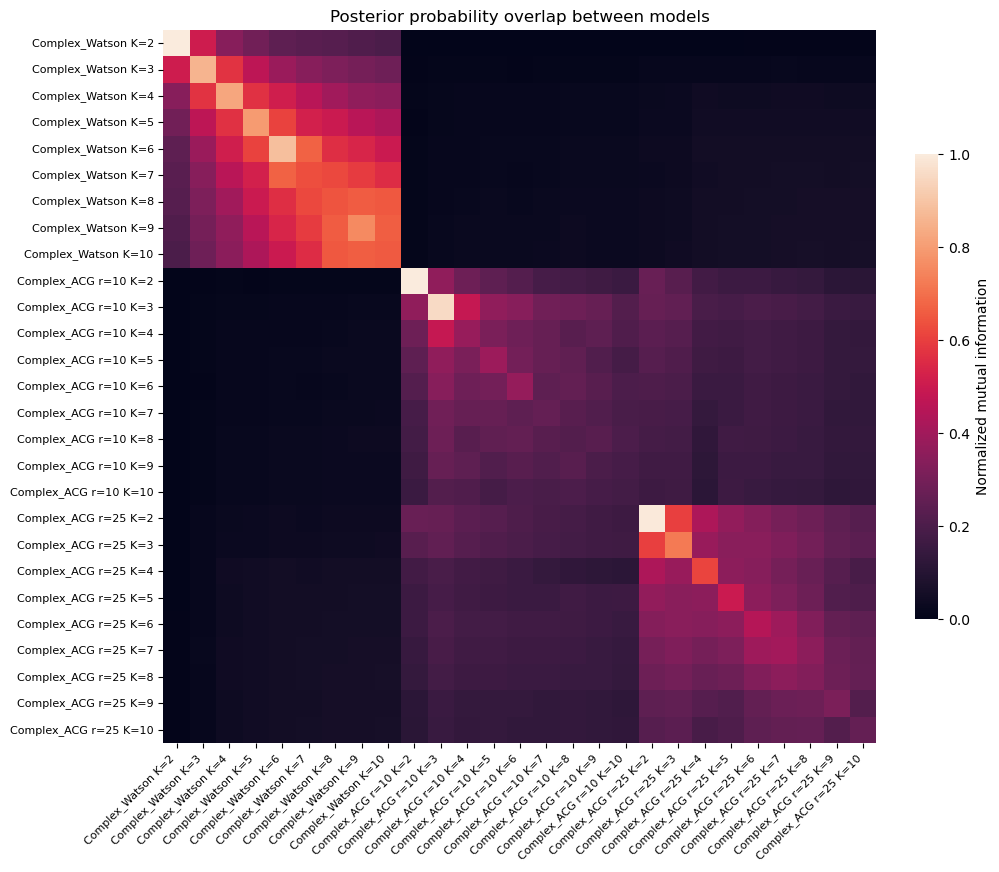

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(NMI_mat,annot=False,xticklabels=modelnames2,yticklabels=modelnames2,vmin=0,vmax=1,square=True,cbar_kws={'label': 'Normalized mutual information','fraction':0.03})
plt.xticks(rotation=45,fontsize=8,ha='right')
plt.yticks(rotation=0,fontsize=8)
plt.title('Posterior probability overlap between models')
plt.savefig('figs/116_modelorder_NMI.png',dpi=300,bbox_inches='tight')